# Linear Regression I: Homework

### Question 1:

We have used the following code to generate different datasets with the same underlying properties but different noise ($\epsilon$). 

To change the noise but not the underlying function, we have set `NumPy`'s `random.seed` to a different value (e.g., 42, 100, 34, etc). 

Each different random seed generated a slightly different dataset for us. Using this approach each dataset is generated using the same underlying function (a quadratic). 

In practice, all datasets are generated using the same properties of the function, such as, the min and max `x` data, the same number of datapoints (20) and the same scale of noise (the noise will be different but the scale of the noise will be the same, set to 5 in the code below). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.linspace(-5, 5, num=20)
y = 2*x**2 - x + 1 + np.random.normal(scale=5, size=len(x))

Your task is to use and modify that code above so as to generate 20 datasets with different noise characteristics, yet generated using the same underlying function. 

For each dataset:

* Fit it with line and compute SSE
* Fit it with parabola and compute SSE
* Fit it with 12th-order polynomial and computet the SSE
* For each type of model used to fit the datasets, make a plot of the mean and STD of the SSEs obtained across all datasets.
* Describe the result obtained also making sure to answer the following questions:
    * Which model fit has a smaller SSE on average?
    * Which model has a more variable SSE across repeats? Why?

Make sure you are approaching your coding using the best practices learned in class so far. Make proficient use of function definitions so as to limite repetitions in your code.

### Question 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


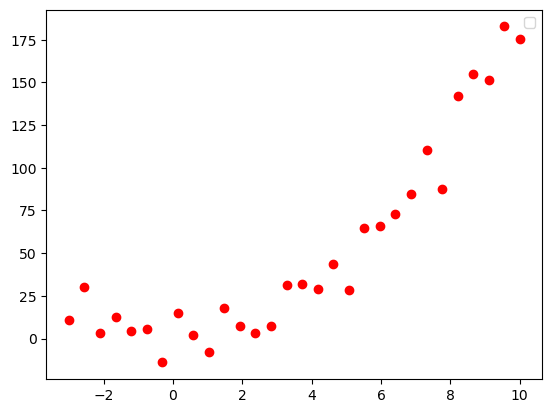

In [8]:
np.random.seed(30)
x = np.linspace(-3, 10, num=30)
y = 2*x**2 - x + 1 + np.random.normal(scale=9, size=len(x))

plt.scatter(x,y, color='red')
plt.legend()
plt.show()

#### Q 2.1

Fit the dataset using a:
* second order polynomial (save the coefficients of this model in variable `q_coeffs`)
* third order polynomial (save the coefficients of this model in variable `t_coeffs`)
* Compute the SSE for each model and determine which model is better, motivate your choice with numbers, text and plots.

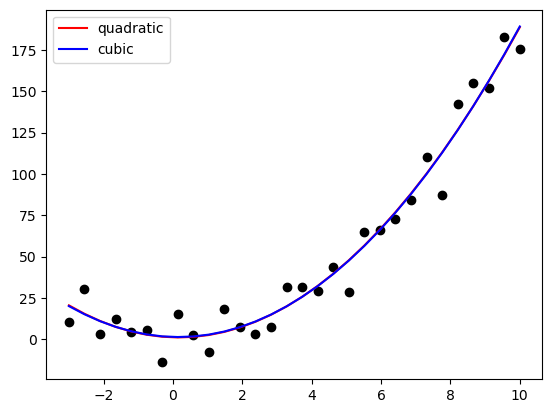

the quadratic model SSE is  3428.0929175646243 .
the cubic model SSE is  3426.676260423882 .


In [23]:
q_coeffs = np.polyfit(x, y, deg=2)
q_fit = np.polyval(q_coeffs, x)

t_coeffs = np.polyfit(x, y, deg=3)
t_fit = np.polyval(t_coeffs, x)

plt.scatter(x,y, color='black')
plt.plot(x, q_fit, label='quadratic', color='red')
plt.plot(x, t_fit, label='cubic', color='blue')
plt.legend()
plt.show()

def sse(y_hat, y):
    # Compute the Sum of Squared Errors (SSE)
    sse = sum( (y-y_hat)**2 )
    return sse

q_sse = sse(q_fit, y)
print("the quadratic model SSE is ", q_sse, ".")

t_sse = sse(t_fit, y)
print("the cubic model SSE is ", t_sse, ".")

The quadratic model fits better but just barely

#### Q 2.2

Let's now create a new x for us:

In [29]:
x_new = np.linspace(-10, 10, num=30)

Your task is to use `q_coeffs` and `t_coeffs` in combination to this new `x_new` values to evaluate the model outside of the original range of the data (Hint: You should cosinder using  `polyval` to implement this).

Note that above we are asking you to evaluate the original model fit within a certain range of x-values onto a new range of values. In a certain ways, we are asking you to use the models to make predictions of data outside of the original range of values. You are predicting data really **out there**!

Next, do the following:
* Plot the orginal x and the oriignal y (the orignal data) as black symbols.
* Using different colors, plot on top of the same figure, the models fit over the new range of values (the models used to make the prediction). [Just to make sure, this plot should have data plus two curves]
* Describe what you see:
    * do both model seem reasonably good at making the prediction?
    * which model seems better and why?
    * which model had a better SSE? 
    * is the result with the SSE consistent with what it appears here from the plot?
    * how do you interpret what it is going on here?


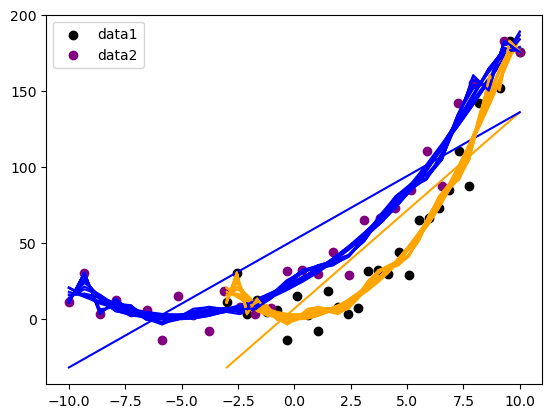

In [90]:
#it has 20 annoying object labels but idk how to get rid of th
plt.scatter(x,y, color='black', label = 'data1')
plt.scatter(x_new, y, color='purple', label = 'data2')
for i in range(1, 20):
        i_coeffs = np.polyfit(x, y, deg=i)
        i_fit = np.polyval(i_coeffs, x)
        print(plt.plot(x, i_fit, color='orange')) # for data 1
        i_coeffs2 = np.polyfit(x_new, y, deg=i)
        i_fit2 = np.polyval(i_coeffs2, x_new)
        print(plt.plot(x_new, i_fit2, color='blue')) # for data 2
plt.legend()
plt.show()

In [ ]:
#group sse by model, plus mu, std for all 20
# model fits not data
# make another plot with sse

# make mean and std as error bar
# for each polynomial have mean and std as a plot (box plot type thing)

In [93]:
i_sse = sse(i_fit, y)
print("SSE  is for data 1 is", i_sse)
i_sse2 = sse(i_fit2, y)
print("SSE for data 2 is", i_sse2)

SSE  is for data 1 is 2041.2139917016175
SSE for data 2 is 2041.2139841284393


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


134493.64813268057
139343.62889311093
154877.5157526014
159727.49651303233
154878.93240974238
159728.91317017286
154917.91212787558
159767.89288830597
154972.37068667627
159822.35144710672
155203.83974115108
160053.8205015813
155207.63990438404
160057.62066481457
155307.23806574303
160157.21882618772
155331.11417992695
160181.094940382
155378.77336533632
160228.75412561867
155398.1793439255
160248.16010362725
155408.85639204158
160258.83715245355
155414.88126718387
160264.8620281998
156017.95432265822
160867.93510118243
156077.87152202634
160927.85220122343
156182.35270314684
161032.33306822492
156182.42076366374
161032.40164228025
156255.2811844201
161105.25544906425
156264.4038658927
161114.37544751656


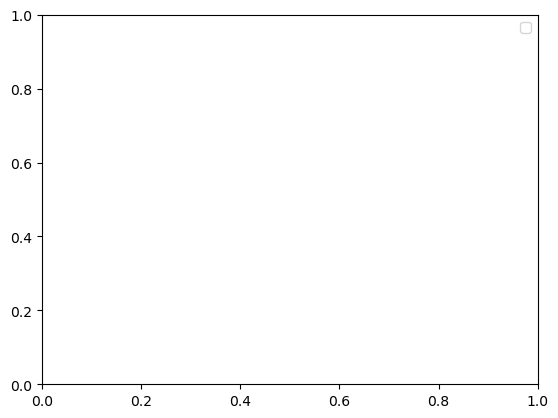

In [95]:
for i in range(1, 20):
        i_coeffs = np.polyfit(x, y, deg=i)
        i_fit = np.polyval(i_coeffs, x)
        print(sse(x, i_fit)) # for data 1
        i_coeffs2 = np.polyfit(x_new, y, deg=i)
        i_fit2 = np.polyval(i_coeffs2, x_new)
        print(sse(x_new, i_fit2)) # for data 2
plt.legend()
plt.show()

While a larger number of curves can show a low margin of error for one graph, it is not necessarily going to be more predictive for future data. You have to find a balance between accuracy for the current data as well as the ability to give leeway enough that it can predict future data.